## Day 2: Session 2: Pandas
In this session, we will use python's pandas library to read, clean, summarize and plot data.

Today we are going to work with an example dataset, which is a simplified version of aggregated data you might derive from international education databases such as TIMSS (https://timss2019.org/international-database/) or PISA (https://www.oecd.org/pisa/data/2018database/). 

__Please note that this is mainly for training purposes and doesn’t reflect actual achievement in the countries included.__

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set path to education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [3]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

#### 1. Data Exploration

In [4]:
# Check dataframe shape: (# of observations, # of columns)

df.shape

(50397, 18)

In [5]:
# Inspect the first two rows of dataframe

df.head(2) # df.tail(2) for last two observations

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [6]:
# Inspect dataframe columns

df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education'],
      dtype='object')

In [7]:
# Get a quick overview of the dataframe (columns, missing values, data types)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_id           50397 non-null  object 
 1   country              50397 non-null  object 
 2   country_school_id    50397 non-null  int64  
 3   country_student_id   50397 non-null  int64  
 4   student_gender       50397 non-null  object 
 5   computer_at_home     49965 non-null  object 
 6   internet_at_home     49965 non-null  object 
 7   immigration_status   50397 non-null  object 
 8   early_education      50397 non-null  object 
 9   repeated_grades      50397 non-null  object 
 10  school_location      49511 non-null  object 
 11  school_type          50397 non-null  object 
 12  school_size          50397 non-null  object 
 13  class_size           49395 non-null  object 
 14  socioeconomic_index  49564 non-null  float64
 15  math_score           50397 non-null 

In [8]:
# Filter dataframe by relevant columns

list_of_relevant_columns = ["country", "school_type", "reading_score", "math_score"]

df[list_of_relevant_columns]

,country,school_type,reading_score,math_score
0,Argentina,Public,424.07239,314.25031
1,Argentina,Public,380.26309,356.07629
2,Argentina,Public,384.89191,338.08029
3,Argentina,Public,392.88031,310.38690
4,Argentina,Public,452.03439,397.42441
...,...,...,...,...
50392,United States,Public,571.73859,543.91510
50393,United States,Public,632.34979,517.25360
50394,United States,Public,638.23328,579.05408
50395,United States,Public,339.23511,302.05261


In [9]:
# Use square bracket notation to inspect a column 

df["math_score"].tail()

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [10]:
# Alternate method: using dot notation:

df.math_score.tail()

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [11]:
# # Summarize select columns: 

df.math_score.mean()

469.53370103240275

In [12]:
# For a more detailed summary: 

df.math_score.describe()

count    50397.000000
mean       469.533701
std         96.473981
min        128.113910
25%        399.351590
50%        470.627810
75%        540.987120
max        797.783020
Name: math_score, dtype: float64

In [13]:
# Select a subset of the dataframe: i.e. values where a conditional statement is True

df[df.math_score>500].shape

(19692, 18)

In [14]:
# Similarly

df[df.math_score<=500].shape

(30705, 18)

In [15]:
# Together, the two subsets above make up the original dataframe

df.shape

(50397, 18)

In [16]:
# We can also use conditions to create new dataframes
# For example, if we want to look at data from a single country: 

df_japan = df[df.country=="Japan"]
df_japan.shape

(6109, 18)

In [17]:
# Check the unique number of values in a column (good for categorical data)

df.country.nunique()

8

In [18]:
# Check what those unique values are: 

df.country.unique()

array(['Argentina', 'Finland', 'Japan', 'Netherlands', 'New Zealand',
       'Norway', 'Romania', 'United States'], dtype=object)

In [19]:
# Useful for categorical variables:

# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

df.repeated_grades.value_counts()

Did not repeat a  grade    32399
No Response                13513
Repeated a  grade           4485
Name: repeated_grades, dtype: int64

In [20]:
# Alternatively, to get the breakdown in percentages: 

df.repeated_grades.value_counts(normalize = True)

Did not repeat a  grade    0.642876
No Response                0.268131
Repeated a  grade          0.088993
Name: repeated_grades, dtype: float64

In [21]:
# How are observations are distributed across country and student_gender?

pd.crosstab(df.country, df.student_gender)

student_gender,Female,Male
country,,
Argentina,6232,5743
Finland,2772,2877
Japan,3120,2989
Netherlands,2330,2435
New Zealand,3154,3019
Norway,2880,2933
Romania,2444,2631
United States,2376,2462


In [22]:
# To get crosstab in percentages, with totals under "All"

pd.crosstab(df.country, df.student_gender, normalize=True, margins = True)

student_gender,Female,Male,All
country,,,
Argentina,0.123658,0.113955,0.237613
Finland,0.055003,0.057087,0.112090
Japan,0.061908,0.059309,0.121218
Netherlands,0.046233,0.048316,0.094549
New Zealand,0.062583,0.059904,0.122487
Norway,0.057146,0.058198,0.115344
Romania,0.048495,0.052205,0.100700
United States,0.047146,0.048852,0.095998
All,0.502173,0.497827,1.000000


#### 2. Visualization: Call matplotlib from pandas

MatPlotLib is a widely used plotting library. You can pass it data directly, either for data exploration purposes or to produce publication quality outputs. 

DataFrames have a helpful set of methods which call MatPlotLib directly.

<AxesSubplot:ylabel='Frequency'>

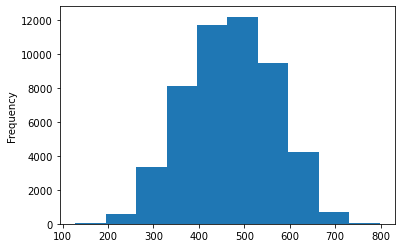

In [23]:
# Histogram: Examine how math scores are distributed

df.math_score.plot(kind="hist")

<AxesSubplot:>

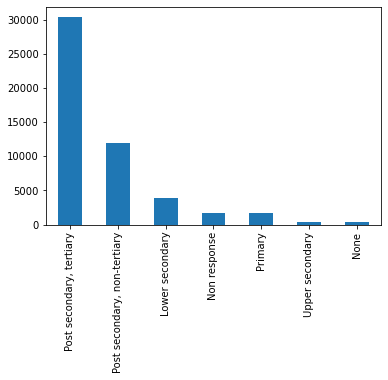

In [24]:
# Bar graph: for levels of parent education

df.parent_education.value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='school_type'>

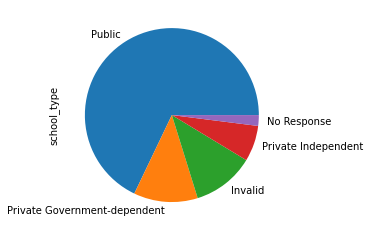

In [25]:
# Pie chart: for school_type

df.school_type.value_counts().plot(kind = 'pie')

<AxesSubplot:title={'center':'Student Scores: Math and Reading'}, xlabel='math_score', ylabel='reading_score'>

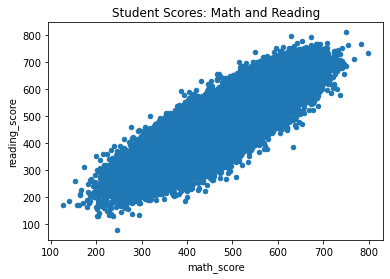

In [26]:
# Scatterplot: Math score vs Reading score

df.plot(x = 'math_score', y = 'reading_score', kind = 'scatter', title = 'Student Scores: Math and Reading')

### Data Munging or Data Wrangling: i.e. cleaning and manipulating datasets so they are fit for analysis

#### 3. Rename columns 

In [27]:
new_column_names = {"country_school_id" : "school_id",
                   "country_student_id" : "student_id"}

df = df.rename(columns=new_column_names)

In [28]:
# Lets's check the column names again. Notice that we have successfully renamed the two columns above:

df.columns

Index(['country_id', 'country', 'school_id', 'student_id', 'student_gender',
       'computer_at_home', 'internet_at_home', 'immigration_status',
       'early_education', 'repeated_grades', 'school_location', 'school_type',
       'school_size', 'class_size', 'socioeconomic_index', 'math_score',
       'reading_score', 'parent_education'],
      dtype='object')

#### 4. Drop columns

In [29]:
# The country_id column seems redundant, so let's drop it:

df.drop(columns=["country_id"], inplace=True)

In [30]:
df.columns

Index(['country', 'school_id', 'student_id', 'student_gender',
       'computer_at_home', 'internet_at_home', 'immigration_status',
       'early_education', 'repeated_grades', 'school_location', 'school_type',
       'school_size', 'class_size', 'socioeconomic_index', 'math_score',
       'reading_score', 'parent_education'],
      dtype='object')

In [31]:
# Alternately, we can also select columns to keep: 

df[["country", "math_score", "reading_score"]]

,country,math_score,reading_score
0,Argentina,314.25031,424.07239
1,Argentina,356.07629,380.26309
2,Argentina,338.08029,384.89191
3,Argentina,310.38690,392.88031
4,Argentina,397.42441,452.03439
...,...,...,...
50392,United States,543.91510,571.73859
50393,United States,517.25360,632.34979
50394,United States,579.05408,638.23328
50395,United States,302.05261,339.23511


#### 5. New column based on other columns

In [32]:
# Using the + operator 

df["total_score"] = df["math_score"] + df["reading_score"]

df[["total_score", "math_score", "reading_score"]].sample(5)

,total_score,math_score,reading_score
18817,944.17670,480.08609,464.09061
45788,1195.11761,564.08313,631.03448
8756,917.94900,453.97369,463.97531
48237,1148.24420,526.69940,621.54480
50303,774.07709,363.80850,410.26859


#### 6. Handle missing values

In [33]:
# Missing values for each column

df.isnull().sum()

country                   0
school_id                 0
student_id                0
student_gender            0
computer_at_home        432
internet_at_home        432
immigration_status        0
early_education           0
repeated_grades           0
school_location         886
school_type               0
school_size               0
class_size             1002
socioeconomic_index     833
math_score                0
reading_score             0
parent_education          0
total_score               0
dtype: int64

In [34]:
# But there are other values like "No Response" and "Invalid" that are not currently counted as None or Null: 

df.school_size.value_counts()

Invalid        11986
No Response     2222
322              176
392              170
350              157
               ...  
22                 2
40                 2
8                  2
54                 1
39                 1
Name: school_size, Length: 863, dtype: int64

In [35]:
# One way of re-assigning these values as None:
df.loc[(df["school_size"] == "No Response")|(df["school_size"] == "Invalid"),"school_size"] = np.nan
df.school_size.isna().sum()

14208

#### Decide what steps to take, eg:
* deduce the missing values (eg. internet_at_home from socioeconomic index)
* fill NaNs using mean, median or a custom strategy (Look up: df.fillna?)
* drop rows with missing values (Look up: df.dropna?)

In [36]:
# check how a method works and what parameters it needs

df.fillna?

Signature:
df.fillna(
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
) -> Union[ForwardRef('DataFrame'), NoneType]
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any

In [37]:
# What happens if we drop all rows with Null values? 

print('original shape: ', df.shape)

print('new shape: ', df.dropna().shape) # NOTE: here, inplace = False by default

original shape:  (50397, 18)
new shape:  (35768, 18)
